# The purpose is to show the ck04models

## Definitions of the libraries

In [2]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import astropy
from astropy.io import fits
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

In [4]:
import pandas as pd
import os
import re

In [5]:
from astroquery.simbad import Simbad

In [6]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [7]:
top_pysynphot_data_dir=os.environ['PYSYN_CDBS']

In [8]:
import pysynphot as S
S.primary_area=6*1e4
S.binning=10.

# Types of stars

In [9]:
colors={'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'};

In [10]:
TypeStar_to_Temperature = {"O":25000., "B":10000., "A":7500.,"F":6000.,"G":5000.,"K":3500 }

In [11]:
TypeStar_to_color= {"O":'c', "B":'b', "A":'g',"F":'r',"G":'m',"K":"k" }

In [12]:
Log_g=[0.,1.,2.,3.,4.,5.]

In [13]:
Log_Z=[-2.5,-2.,-1.5,-1.,-.5,0.,0.2,0.5]

## Make a dictionary of filenames

## Plot the SED

/Users/dagoret/anaconda/lib/python2.7/site-packages/matplotlib/ticker.py:2039: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


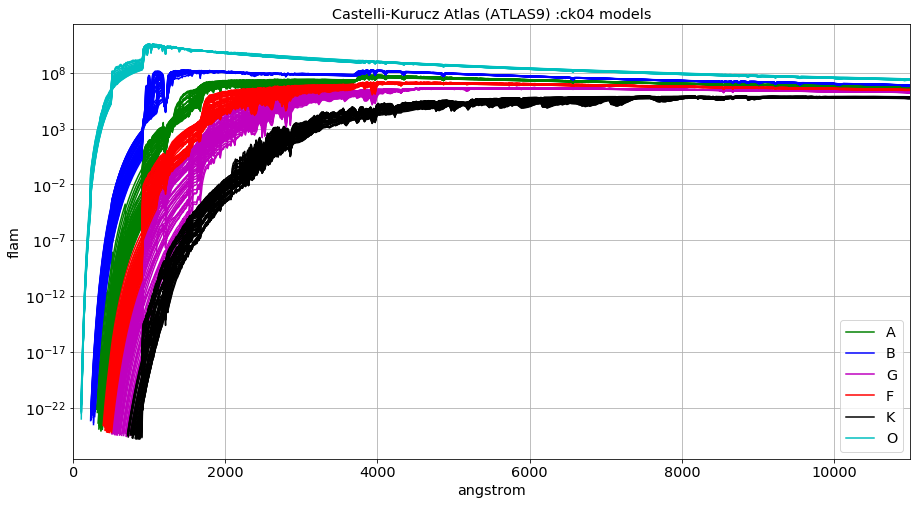

In [14]:
for key, temp in TypeStar_to_Temperature.iteritems(): 
    index=0
    for log_g in Log_g:
        for logz in Log_Z:
            sed = S.Icat('ck04models', temp, logz, log_g) 
            if index==0:
                plt.semilogy(sed.wave,sed.flux,TypeStar_to_color[key],label=key)
            else:
                plt.semilogy(sed.wave,sed.flux,TypeStar_to_color[key])

            index+=1
plt.xlim(0, 11000)
plt.xlabel(sed.waveunits)
plt.ylabel(sed.fluxunits)
plt.grid(True)
plt.legend()
plt.title("Castelli-Kurucz Atlas (ATLAS9) :ck04 models")
plt.savefig("browse_ck04_log.png")

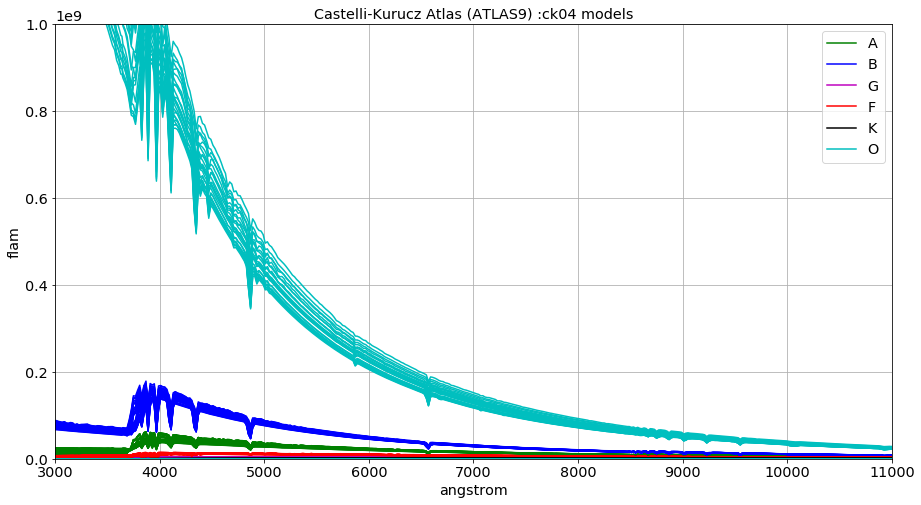

In [16]:
for key, temp in TypeStar_to_Temperature.iteritems(): 
    index=0
    for log_g in Log_g:
        for logz in Log_Z:
            sed = S.Icat('ck04models', temp, logz, log_g) 
            if index==0:
                plt.plot(sed.wave,sed.flux,TypeStar_to_color[key],label=key)
            else:
                plt.plot(sed.wave,sed.flux,TypeStar_to_color[key])

            index+=1
plt.xlim(3000, 11000)
plt.ylim(0., 1e9)
plt.xlabel(sed.waveunits)
plt.ylabel(sed.fluxunits)
plt.grid(True)
plt.legend()
plt.title("Castelli-Kurucz Atlas (ATLAS9) :ck04 models")
plt.savefig("browse_ck04_lin.png")